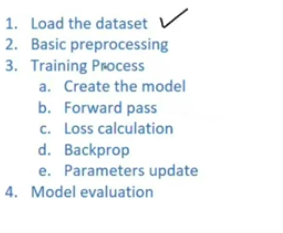

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train

array([[ 1.84736254,  1.158364  ,  2.28726604, ...,  2.1907067 ,
         4.26566316,  0.89571687],
       [ 0.50902698,  0.01629675,  0.68258057, ...,  1.59583393,
         2.26863913,  1.19977783],
       [ 2.32167108,  0.44186707,  2.44510395, ...,  1.12695297,
        -0.09102441,  0.26830749],
       ...,
       [-0.48792727, -0.65932619, -0.38063317, ...,  0.33113122,
         0.57409322,  1.10901336],
       [-0.73867637, -0.23375587, -0.66430298, ...,  0.44914887,
        -0.38013333,  0.50202599],
       [ 0.43047907,  0.19662316,  0.4765144 , ...,  1.57350626,
         0.50056263,  1.02392167]], shape=(455, 30))

In [8]:
y_train

78     M
351    M
272    M
514    M
132    M
      ..
312    B
35     M
485    B
469    B
392    M
Name: diagnosis, Length: 455, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Numpy arrays to PyTorch tensors

In [13]:
import torch

In [16]:
X_train_tensor = torch.from_numpy(X_train)

X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)


In [17]:
X_train_tensor

tensor([[ 1.8474,  1.1584,  2.2873,  ...,  2.1907,  4.2657,  0.8957],
        [ 0.5090,  0.0163,  0.6826,  ...,  1.5958,  2.2686,  1.1998],
        [ 2.3217,  0.4419,  2.4451,  ...,  1.1270, -0.0910,  0.2683],
        ...,
        [-0.4879, -0.6593, -0.3806,  ...,  0.3311,  0.5741,  1.1090],
        [-0.7387, -0.2338, -0.6643,  ...,  0.4491, -0.3801,  0.5020],
        [ 0.4305,  0.1966,  0.4765,  ...,  1.5735,  0.5006,  1.0239]],
       dtype=torch.float64)

In [20]:
X_train_tensor.shape

torch.Size([455, 30])

# Defining the model

In [21]:
class MySimpleNN():
    def __init__(self,X):
        self.weights = torch.rand(X.shape[1],1,dtype=torch.float64,requires_grad=True)
        self.bias =  torch.zeros(1,dtype=torch.float64,requires_grad=True)
    
    def forward(self,X):
        z = torch.matmul(X,self.weights) + self.bias
        y_pred = torch.sigmoid(z)
        return y_pred
    

    def loss_function(self,y_pred,y):
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

        # Calculate loss
        loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
        return loss

In [23]:
learning_rate = 0.1
epochs = 25


In [25]:
model  = MySimpleNN(X_train_tensor)

for epoch in range(epochs):
    y_pred  = model.forward(X_train_tensor)
    
    loss = model.loss_function(y_pred,y_train_tensor)
    loss.backward()

    with torch.no_grad():
        model.weights -= learning_rate*model.weights.grad
        model.bias-= learning_rate*model.bias.grad

    model.weights.grad.zero_()
    model.bias.grad.zero_()
    print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.363572968943835
Epoch: 2, Loss: 3.2216361695277396
Epoch: 3, Loss: 3.070979034223939
Epoch: 4, Loss: 2.920583443973542
Epoch: 5, Loss: 2.7696054513405532
Epoch: 6, Loss: 2.617604233474456
Epoch: 7, Loss: 2.4584156497727148
Epoch: 8, Loss: 2.3012830778159374
Epoch: 9, Loss: 2.1436971173504364
Epoch: 10, Loss: 1.9911789484176496
Epoch: 11, Loss: 1.8403442152991922
Epoch: 12, Loss: 1.6922534062479235
Epoch: 13, Loss: 1.5489695870967581
Epoch: 14, Loss: 1.4144299421971263
Epoch: 15, Loss: 1.2902248848175375
Epoch: 16, Loss: 1.1814736581406886
Epoch: 17, Loss: 1.0887607294071284
Epoch: 18, Loss: 1.0119132825079435
Epoch: 19, Loss: 0.9498737333407697
Epoch: 20, Loss: 0.900804281795035
Epoch: 21, Loss: 0.8624311452626361
Epoch: 22, Loss: 0.8324535903014939
Epoch: 23, Loss: 0.8088363275984598
Epoch: 24, Loss: 0.7899411257869743
Epoch: 25, Loss: 0.7745385759033362


In [26]:
model.bias

tensor([-0.1674], dtype=torch.float64, requires_grad=True)

In [27]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.5897198915481567


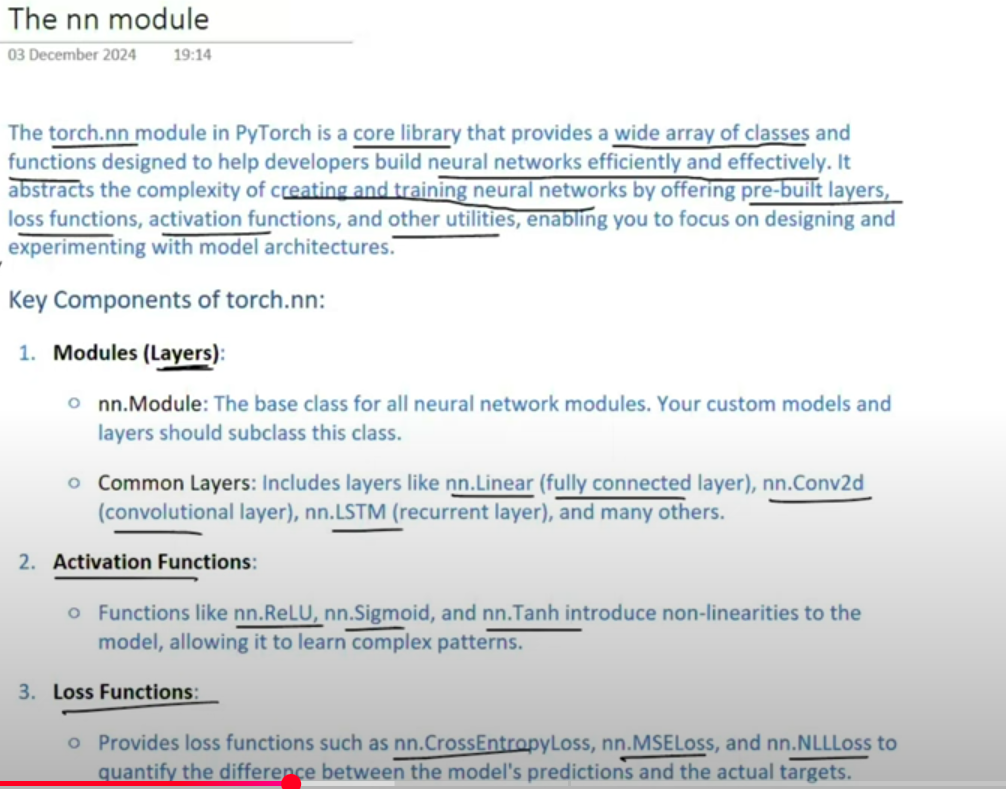

why we need the `SEQUENTIAL`


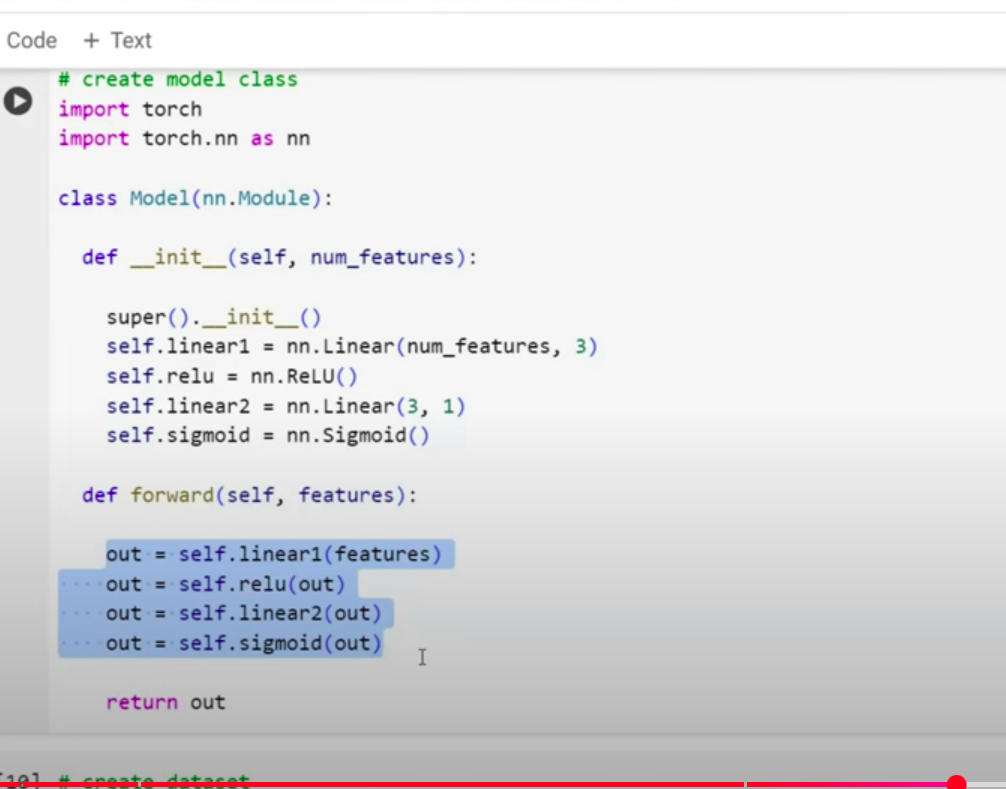

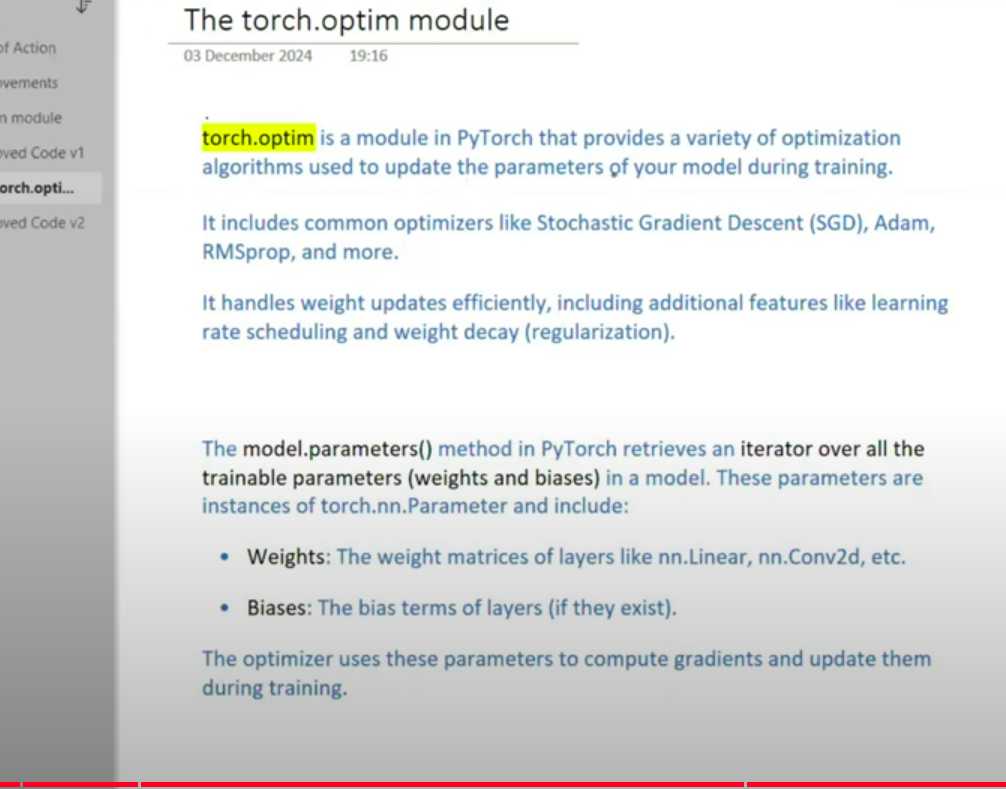